In [1]:
!mkdir -p ~/aiffel/data_analysis_basic/data
!ln -s ~/data/* ~/aiffel/data_analysis_basic/data

ln: failed to create symbolic link '/aiffel/aiffel/data_analysis_basic/data/customer.csv': File exists
ln: failed to create symbolic link '/aiffel/aiffel/data_analysis_basic/data/Sales.csv': File exists


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
sal_l = pd.read_csv('~/aiffel/data_analysis_basic/data/Sales.csv')
sal_l.head()

,install,Time_stamp,Game_Name,Status,Payment,Customer_ID
0,2022-01-08,2022-02-05,MineGround,play,4900,facilis140
1,2022-01-05,2022-02-17,MineGround,play,29900,debitis994
2,2022-01-29,2022-02-06,MineGround,play,4900,possimus246
3,2022-01-09,2022-02-05,MineGround,play,900,occaecati138
4,2022-01-08,2022-02-01,MineGround,play,900,corrupti325


In [15]:
dir(plt)

['Annotation',
 'Arrow',
 'Artist',
 'AutoLocator',
 'Axes',
 'Button',
 'Circle',
 'Figure',
 'FigureCanvasBase',
 'FixedFormatter',
 'FixedLocator',
 'FormatStrFormatter',
 'Formatter',
 'FuncFormatter',
 'GridSpec',
 'IndexLocator',
 'Line2D',
 'LinearLocator',
 'Locator',
 'LogFormatter',
 'LogFormatterExponent',
 'LogFormatterMathtext',
 'LogLocator',
 'MaxNLocator',
 'MouseButton',
 'MultipleLocator',
 'Normalize',
 'NullFormatter',
 'NullLocator',
 'Number',
 'PolarAxes',
 'Polygon',
 'Rectangle',
 'ScalarFormatter',
 'Slider',
 'Subplot',
 'SubplotSpec',
 'SubplotTool',
 'Text',
 'TickHelper',
 'Widget',
 '_INSTALL_FIG_OBSERVER',
 '_IP_REGISTERED',
 '_IoffContext',
 '_IonContext',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_api',
 '_auto_draw_if_interactive',
 '_backend_mod',
 '_code_objs',
 '_copy_docstring_and_deprecators',
 '_get_required_interactive_framework',
 '_interactive_bk',
 '_log',
 '_pylab_hel

In [17]:
help(plt.title)

Help on function title in module matplotlib.pyplot:

title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)
    Set a title for the Axes.
    
    Set one of the three available Axes titles. The available titles
    are positioned above the Axes in the center, flush with the left
    edge, and flush with the right edge.
    
    Parameters
    ----------
    label : str
        Text to use for the title
    
    fontdict : dict
        A dictionary controlling the appearance of the title text,
        the default *fontdict* is::
    
           {'fontsize': rcParams['axes.titlesize'],
            'fontweight': rcParams['axes.titleweight'],
            'color': rcParams['axes.titlecolor'],
            'verticalalignment': 'baseline',
            'horizontalalignment': loc}
    
    loc : {'center', 'left', 'right'}, default: :rc:`axes.titlelocation`
        Which title to set.
    
    y : float, default: :rc:`axes.titley`
        Vertical Axes loation for the title (1.0 i

In [6]:
sal_l.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99845 entries, 0 to 99844
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   install      99845 non-null  object
 1   Time_stamp   99845 non-null  object
 2   Game_Name    99845 non-null  object
 3   Status       99845 non-null  object
 4   Payment      99845 non-null  int64 
 5   Customer_ID  99845 non-null  object
dtypes: int64(1), object(5)
memory usage: 4.6+ MB


In [8]:
sal_l['Payment'].head()

0     4900
1    29900
2     4900
3      900
4      900
Name: Payment, dtype: int64

In [12]:
sal_l['Payment'].sum()

144443100

<function matplotlib.pyplot.show(close=None, block=None)>

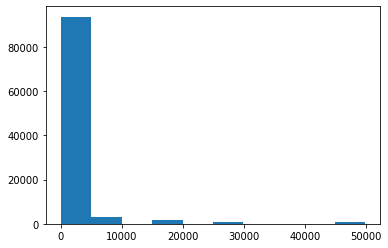

In [14]:
plt.hist(sal_l['Payment'])
plt.show

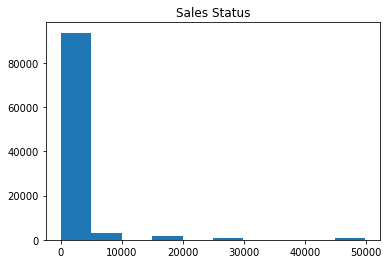

In [13]:
plt.hist(sal_l['Payment'])
plt.title('Sales Status')
plt.show()

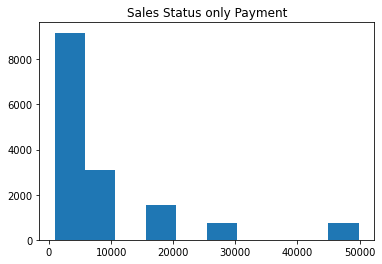

In [19]:
sales = sal_l[sal_l['Payment'] != 0]

plt.hist(sales['Payment'])
plt.title('Sales Status only Payment')
plt.show()

In [20]:
sales['Payment'].describe()

count    15309.000000
mean      9435.175387
std      11897.228643
min        900.000000
25%        900.000000
50%       4900.000000
75%       9900.000000
max      49900.000000
Name: Payment, dtype: float64

mean      9435
min        900
50%       4900 중위값

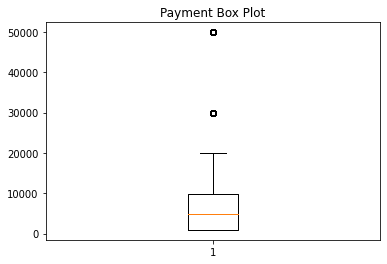

In [21]:
plt.boxplot(sales['Payment'])
plt.title("Payment Box Plot")
plt.show()

In [22]:
sales['Payment'].value_counts()

900      5369
4900     3807
9900     3086
19900    1544
29900     766
49900     737
Name: Payment, dtype: int64

In [25]:
len(sales['Payment'])

15309

In [26]:
sales['Payment'].value_counts() / len(sales['Payment'])

900      0.350709
4900     0.248677
9900     0.201581
19900    0.100856
29900    0.050036
49900    0.048142
Name: Payment, dtype: float64

In [27]:
sal_l["Month"] = sal_l['Time_stamp'].str[:7]

In [28]:
sal_l["Payment"].groupby(sal_l['Month']).sum()

Month
2022-02    80841800
2022-03    63601300
Name: Payment, dtype: int64

월별로 결제금액을 나눠보니
1월에는 결제금액이 아예 없고, 
2월에 비해 3월 결제금액이 줄었다

In [29]:
sal_l.columns

Index(['install', 'Time_stamp', 'Game_Name', 'Status', 'Payment',
       'Customer_ID', 'Month'],
      dtype='object')

In [30]:
temp_d = sal_l['Payment'].groupby(sal_l['Month']).sum()

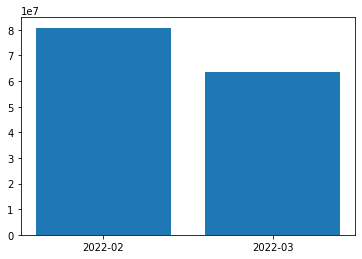

In [31]:
ax = plt.bar(temp_d.index, temp_d)

[Text(0, 0, '80,841,800'), Text(0, 0, '63,601,300')]

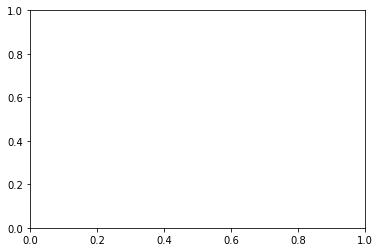

In [38]:
plt.bar_label(ax, labels = [f'{x:,.0f}' for x in ax.datavalues], label_type = 'center')
#f'{x:,.0f}' 꼭 이대로 써야함 ㅠ
# x: 위치는 띄어쓰기 해도 됨 ㅠ

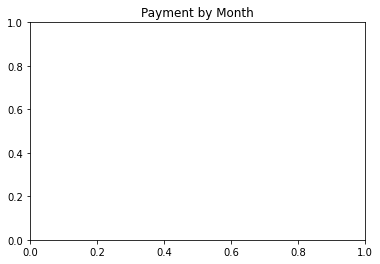

In [41]:
plt.title("Payment by Month")
plt.show()

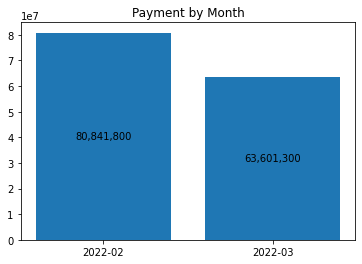

In [42]:
temp_d = sal_l['Payment'].groupby(sal_l['Month']).sum()
ax = plt.bar(temp_d.index, temp_d)
plt.bar_label(ax, labels = [f'{x:,.0f}' for x in ax.datavalues], label_type = 'center')
plt.title("Payment by Month")
plt.show()

In [43]:
sal2 = sal_l[(sal_l['Month'] == '2022-02') & (sal_l['Payment'] != 0)]

In [44]:
sal2.reset_index(drop = True)

,install,Time_stamp,Game_Name,Status,Payment,Customer_ID,Month
0,2022-01-08,2022-02-05,MineGround,play,4900,facilis140,2022-02
1,2022-01-05,2022-02-17,MineGround,play,29900,debitis994,2022-02
2,2022-01-29,2022-02-06,MineGround,play,4900,possimus246,2022-02
3,2022-01-09,2022-02-05,MineGround,play,900,occaecati138,2022-02
4,2022-01-08,2022-02-01,MineGround,play,900,corrupti325,2022-02
...,...,...,...,...,...,...,...
8537,2022-02-12,2022-02-14,SoccerManager,play,4900,quam946,2022-02
8538,2022-02-10,2022-02-14,SoccerManager,play,4900,commodi507,2022-02
8539,2022-02-16,2022-02-21,SoccerManager,play,900,rerum275,2022-02
8540,2022-02-16,2022-02-20,SoccerManager,play,9900,quo151,2022-02


In [45]:
temp_d2 = sal2['Payment'].groupby(sal2['Time_stamp']).sum()

In [62]:
plt.figure(figsize = (30, 5))

<Figure size 2160x360 with 0 Axes>

<Figure size 2160x360 with 0 Axes>

<BarContainer object of 27 artists>

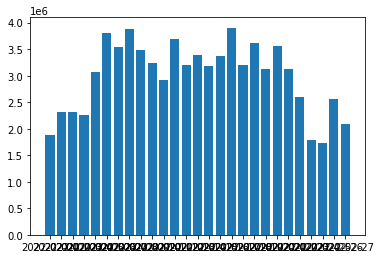

In [63]:
plt.bar(temp_d2.index, temp_d2)

Text(0.5, 1.0, 'Feb Payments')

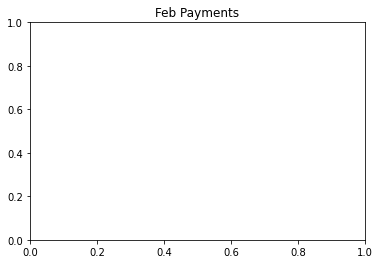

In [50]:
plt.title("Feb Payments")

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

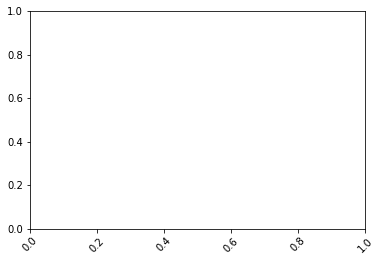

In [52]:
plt.xticks(rotation = 45)

In [53]:
plt.show()

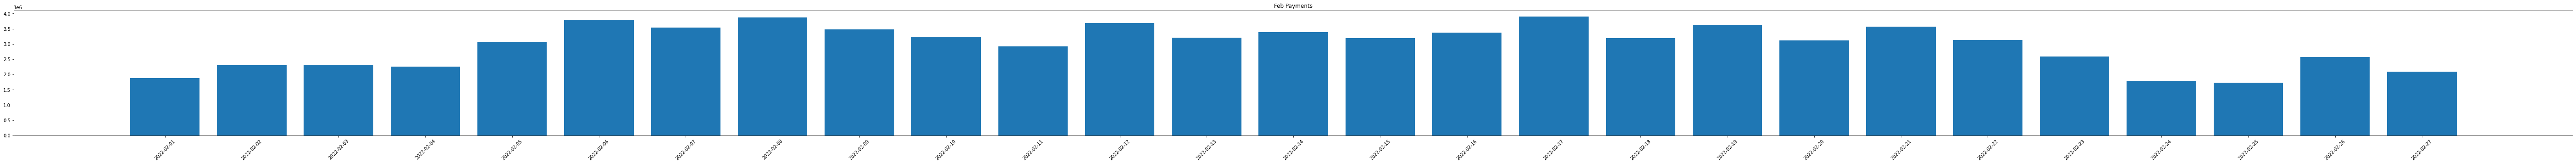

In [66]:
temp_d2 = sal2['Payment'].groupby(sal2['Time_stamp']).sum()
plt.figure(figsize = (100, 5))
plt.bar(temp_d2.index, temp_d2)
plt.title("Feb Payments")
plt.xticks(rotation = 45)
plt.show()

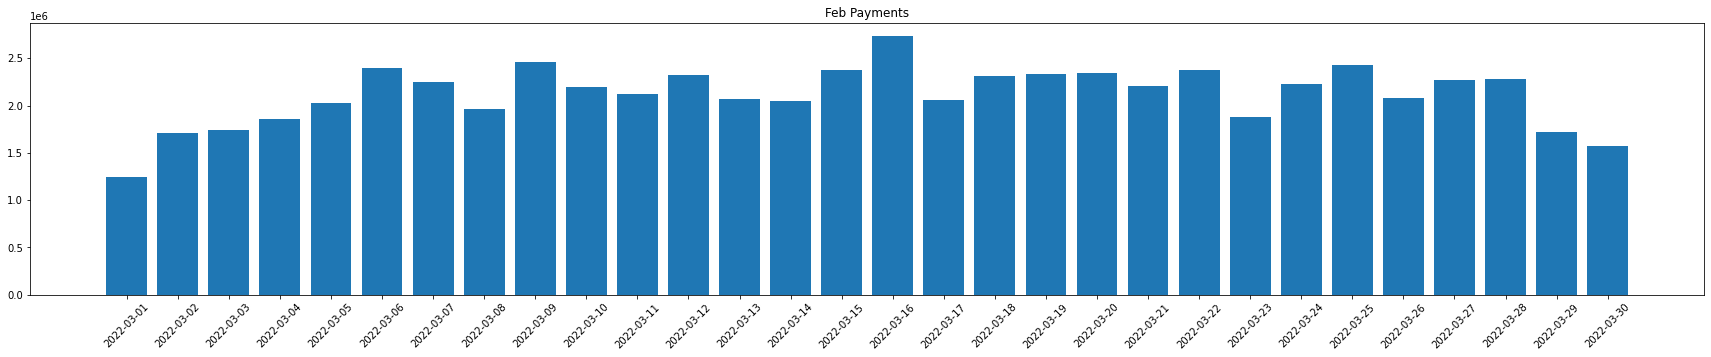

In [68]:
sal3 = sal_l[(sal_l['Month'] == '2022-03') & (sal_l['Payment'] != 0)]
sal3.reset_index(drop = True)


temp_d3 = sal3['Payment'].groupby(sal3['Time_stamp']).sum()
plt.figure(figsize = (30, 5))
plt.bar(temp_d3.index, temp_d3)
plt.title("Feb Payments")
plt.xticks(rotation = 45)
plt.show()

In [69]:
cus_l = pd.read_csv('~/aiffel/data_analysis_basic/data/customer.csv')
print(cus_l)

          Customer_ID Name     Nickname  Password  \
0          facilis140  이영순         quos  ********   
1          debitis994  김중수    molestiae  ********   
2         possimus246  양은경          rem  ********   
3        occaecati138  백도윤       libero  ********   
4         corrupti325  김영수   temporibus  ********   
...               ...  ...          ...       ...   
99840        dicta630  김예지          sit  ********   
99841      tempora976  문은경         modi  ********   
99842        iusto840  강중수        iusto  ********   
99843         nemo273  황정남     deleniti  ********   
99844  consequatur371  이영식  accusantium  ********   

                              Email       Birth  Gender              C.P.  \
0                   coejongsu@yu.kr  1989-03-11  female  01x9-4x625-x5x3x   
1                   jiweon02@ju.org  1995-11-19    male  01x9-3x228-x3x9x   
2           coesubin@jusighoesa.com  2005-12-24  female  01x9-7x873-x2x2x   
3            yeongceol80@gangryu.kr  2003-02-09  female

In [70]:
cus_l.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99845 entries, 0 to 99844
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Customer_ID    99845 non-null  object
 1   Name           99845 non-null  object
 2   Nickname       99845 non-null  object
 3   Password       99845 non-null  object
 4   Email          99845 non-null  object
 5   Birth          99845 non-null  object
 6   Gender         99845 non-null  object
 7   C.P.           99845 non-null  object
 8   MobileCompany  99845 non-null  object
 9   OS             99845 non-null  object
dtypes: object(10)
memory usage: 7.6+ MB


In [71]:
pie_d = cus_l.groupby(["Gender"]).count().Name

([<matplotlib.patches.Wedge at 0x7f7daab0c1c0>,
 [Text(0.3329656865208806, 1.0483958468058137, 'female'),
  Text(-0.33296558836297563, -1.0483958779803064, 'male')],
 [Text(0.18161764719320758, 0.5718522800758983, '40.2%'),
  Text(-0.18161759365253216, -0.571852297080167, '59.8%')])

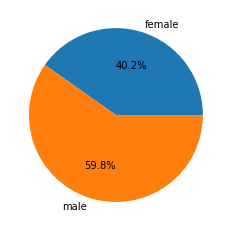

In [73]:
plt.pie(pie_d, labels = pie_d.index, autopct = '%1.1f%%')

Text(0.5, 1.0, 'Customer Gender')

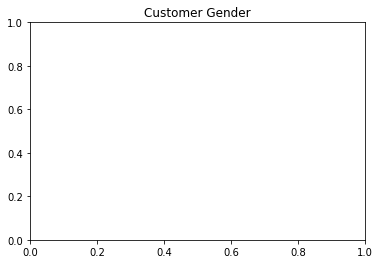

In [74]:
plt.title("Customer Gender")

In [75]:
plt.show()

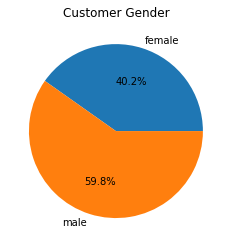

In [76]:
pie_d = cus_l.groupby(["Gender"]).count().Name
plt.pie(pie_d, labels = pie_d.index, autopct = '%1.1f%%')
plt.title("Customer Gender")
plt.show()

In [77]:
total_d = pd.merge(cus_l, sal_l)

In [78]:
pay_cus = total_d[(total_d["Payment"] != 0)]

In [79]:
pie_d = pay_cus.groupby(['Gender']).count().Name

([<matplotlib.patches.Wedge at 0x7f7daaa8fe20>,
 [Text(0.3639993419676102, 1.0380291320801873, 'female'),
  Text(-0.36399924478030743, -1.0380291661602608, 'male')],
 [Text(0.19854509561869643, 0.5661977084073748, '39.3%'),
  Text(-0.19854504260744038, -0.5661977269965057, '60.7%')])

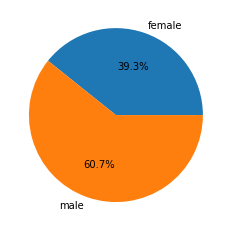

In [80]:
plt.pie(pie_d, labels = pie_d.index, autopct = '%1.1f%%')

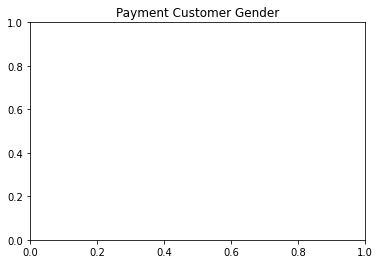

In [81]:
plt.title("Payment Customer Gender")
plt.show()

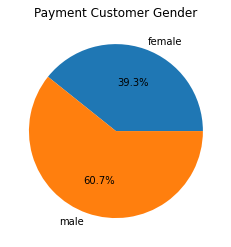

In [82]:
total_d = pd.merge(cus_l, sal_l)
pay_cus = total_d[(total_d["Payment"] != 0)]
pie_d = pay_cus.groupby(['Gender']).count().Name
plt.pie(pie_d, labels = pie_d.index, autopct = '%1.1f%%')

plt.title("Payment Customer Gender")
plt.show()

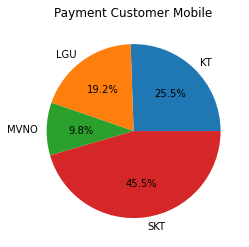

In [84]:
pie_d = pay_cus.groupby(["MobileCompany"]).count().Name
plt.pie(pie_d, labels = pie_d.index, autopct = '%1.1f%%')
plt.title('Payment Customer Mobile')
plt.show()

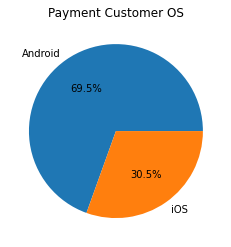

In [85]:
pie_d = pay_cus.groupby(["OS"]).count().Name
plt.pie(pie_d, labels = pie_d.index, autopct = '%1.1f%%')
plt.title('Payment Customer OS')
plt.show()